In [3]:
import pandas as pd
import glob

# Get a list of all CSV files in the current directory that match the pattern
file_list = glob.glob('data/測試資料/銷售資料_*.xlsx')
print(len(file_list))

# Initialize variables
total_transactions = 0
all_psids = set()
all_userids = set()

# Loop through each file
for file in file_list:
    # Read the CSV file into a DataFrame
    df = pd.read_excel(file)
    
    # Add the number of rows to the total transaction count
    total_transactions += len(df)
    
    # Check if 'ASID' column exists before processing
    if 'ASID' in df.columns:
        # Add the unique PSIDs from the 'PSID' column to the set of unique PSIDs
        all_psids.update(df['ASID'].unique())
    
    # Check if 'userID' column exists before processing
    if 'USER_ID' in df.columns:
        # Add the unique userIDs from the 'userID' column to the set of unique userIDs
        all_userids.update(df['USER_ID'].unique())

# Get the total number of unique PSIDs and userIDs
total_unique_psids = len(all_psids)
total_unique_userids = len(all_userids)

# Print the results
print(f"總共有 {total_transactions} 筆交易資料")
print(f"總共有 {total_unique_psids} 個 PSID")
print(f"總共有 {total_unique_userids} 個 userID")

16
總共有 677192 筆交易資料
總共有 60499 個 PSID
總共有 11 個 userID


# 資料前處理

## 資料載入

In [ ]:
import os
import glob
import pandas as pd

# 1. 設定資料路徑
data_dir = 'data/測試資料/'  # 改成你的資料夾路徑
pattern = os.path.join(data_dir, '銷售資料_*.xlsx')
file_list = glob.glob(pattern)

# 2. 讀取並合併所有 Excel 檔
dfs = []
for fp in file_list:
    df = pd.read_excel(fp)
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)

## 資料 EDA

轉換失敗的筆數： 0
  order_date order_time  timestamp
0   20210101   21:19:57 2021-01-01
1   20210101   21:27:52 2021-01-01
2   20210101   21:27:52 2021-01-01
3   20210101   21:27:52 2021-01-01
4   20210101   21:40:35 2021-01-01
各欄位缺失值比例：
訂單編號                0.000000
order_date          0.000000
order_time          0.000000
PSID                0.129949
user_id             0.000000
streamer_id         0.000000
CHANNEL_NAME        0.000000
item_id             0.023714
item_name           0.000000
樣式                  0.587342
規格                  0.518495
unit_price          0.000000
quantity            0.000000
折扣                  0.000000
total_amount        0.000000
付款單號                0.000000
專屬折扣                0.000000
運費                  0.000000
收款金額                0.000000
payment_method      0.000000
運送方式                0.000000
shipping_address    0.001505
場次                  0.025566
COMMENT_ID          0.845761
post_id             0.728842
comment             0.724577
timestamp      

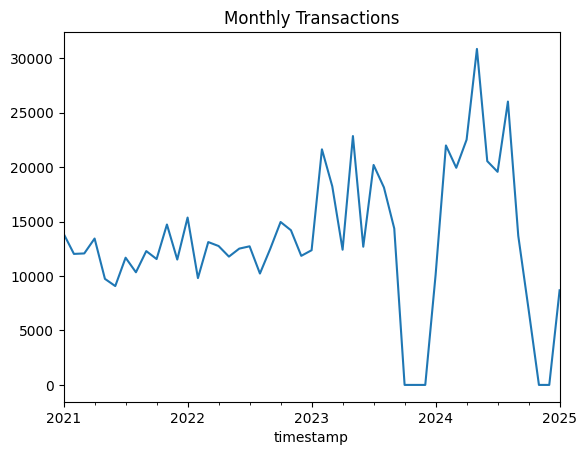

In [15]:
# 3. 統一欄位名稱
data = data.rename(columns={
    'ASID': 'user_id',
    'USER_ID': 'streamer_id',
    '商品ID': 'item_id',
    '商品名稱': 'item_name',
    '單價': 'unit_price',
    '數量': 'quantity',
    '總金額': 'total_amount',
    '付款方式': 'payment_method',
    '寄送地址': 'shipping_address',
    '下單日期': 'order_date',
    'POST_ID': 'post_id',
    '留言': 'comment',
    '時間戳記': 'order_time',
})

# 4. 轉換時間欄位型別
# 假設原始時間欄位叫 'timestamp'，格式如 '2022-01-15 14:23:00'
data['order_date'] = data['order_date'].astype(str).str.zfill(8)
data['timestamp'] = pd.to_datetime(
    data['order_date'],
    format='%Y%m%d',
    errors='coerce'
)
print("轉換失敗的筆數：", data['timestamp'].isna().sum())
print(data[['order_date', 'order_time', 'timestamp']].head())

# 5. 處理重複與缺失值
# 刪除完全重複的整列
data = data.drop_duplicates()
# 檢視缺失值比例
print("各欄位缺失值比例：")
print(data.isna().mean())

# 6. 基本統計
total_transactions = len(data)
unique_users       = data['user_id'].nunique()
unique_streamers   = data['streamer_id'].nunique()
# 如果有 item_id 欄位
# unique_items       = data['item_id'].nunique()

print(f"總交易筆數：{total_transactions}")
print(f"獨立用戶數：{unique_users}")
print(f"獨立直播主數：{unique_streamers}")
# print(f"獨立商品數：{unique_items}")

# 7. 時序分佈（可視化）
#  7.1 每月交易量
monthly = data.set_index('timestamp').resample('ME').size()
print("\n每月交易量：")
print(monthly)

#  7.2 每日交易量
daily = data.set_index('timestamp').resample('D').size()
print("\n每日交易量前五：")
print(daily.head())

# 若要畫圖，可再加：
import matplotlib.pyplot as plt
monthly.plot(title='Monthly Transactions')
plt.show()


In [8]:
data.head()

,訂單編號,order_date,order_time,PSID,user_id,streamer_id,CHANNEL_NAME,item_id,item_name,樣式,...,運費,收款金額,payment_method,運送方式,shipping_address,場次,COMMENT_ID,post_id,comment,timestamp
0,BD210101-24659032,20210101,00:07:58,3123281874383707,3569894936461536,15217,小資女精品服飾( 劉冰冰小資女精品服飾有限公司,NaN,發財金$$$$$,NaN,...,120,6687,匯款,7-11C2C,7-ELEVEN 大德門市（地址：高雄市三民區寶玉里大豐二路348號 / 電話：--）,NaN,NaN,NaN,NaN,2021-01-01 00:07:58
1,BD210101-24659033,20210101,00:07:58,2056845641067102,10213250868933593,15217,小資女精品服飾( 劉冰冰小資女精品服飾有限公司,NaN,發財金$$$$$,NaN,...,60,3578,匯款,7-11C2C,7-ELEVEN 長青門市（地址：高雄市鳥松區鳥松里大智路5號 / 電話：--）,NaN,NaN,NaN,NaN,2021-01-01 00:07:58
2,BD210101-24659034,20210101,00:07:58,2549311421797719,1158290481020558,15217,小資女精品服飾( 劉冰冰小資女精品服飾有限公司,NaN,發財金$$$$$,NaN,...,0,6031,匯款,一般宅配,新北市板橋區樂群路180號7樓之6,NaN,NaN,NaN,NaN,2021-01-01 00:07:58
3,BD210101-24659035,20210101,00:07:59,3648955408479224,2920326754670177,15217,小資女精品服飾( 劉冰冰小資女精品服飾有限公司,NaN,發財金$$$$$,NaN,...,60,2484,匯款,一般宅配,台東縣綠島鄉南寮村漁港35號,NaN,NaN,NaN,NaN,2021-01-01 00:07:59
4,BD210101-24659036,20210101,00:08:00,2663100147041730,10158151406577582,15217,小資女精品服飾( 劉冰冰小資女精品服飾有限公司,NaN,發財金$$$$$,NaN,...,60,987,匯款,全家C2C,全家 全家五股高亞店（地址：新北市五股區興珍里中興路一段142號142之1號一 / 電話：0...,NaN,NaN,NaN,NaN,2021-01-01 00:08:00


### 移除資料中單價為 0 的交易

In [10]:
print("移除前筆數：", len(data))
data = data[data['unit_price'] != 0].reset_index(drop=True)
print("移除後筆數：", len(data))

移除前筆數： 677192
移除後筆數： 648006


In [12]:
data.tail()

,訂單編號,order_date,order_time,PSID,user_id,streamer_id,CHANNEL_NAME,item_id,item_name,樣式,...,運費,收款金額,payment_method,運送方式,shipping_address,場次,COMMENT_ID,post_id,comment,timestamp
648001,BD250122-258692787,20250122,00:08:40,24457285620583492.0,10219025085898062,933,迎鶴珠寶銀樓,21918227.0,0.27金豆,NaN,...,0,11623,匯款,全家C2C,全家 全家三重重仁店\n[超商店號：022763]（地址：新北市三重區重陽路三段5巷30號 ...,20250121.0,NaN,NaN,NaN,2025-01-22 00:08:40
648002,BD250122-258694574,20250122,00:29:28,6210449768993289.0,210565115023956,933,迎鶴珠寶銀樓,21918448.0,0.09狐仙花絲球,NaN,...,0,10163,匯款,全家C2C,全家 全家重陽店\n[超商店號：020277]（地址：台北市南港區重陽路183﹑185號1樓...,20250121.0,NaN,NaN,NaN,2025-01-22 00:29:28
648003,BD250122-258725100,20250122,16:10:40,NaN,4376001085747569,933,迎鶴珠寶銀樓,NaN,0.27紅蘿蔔耳環,NaN,...,0,3406,自取,一般宅配,自取點-迎鶴珠寶銀樓,20250121.0,NaN,NaN,NaN,2025-01-22 16:10:40
648004,BD250122-258758954,20250122,22:20:45,NaN,938385163226476,933,迎鶴珠寶銀樓,21913585.0,0.1g手機貼盲包(算6件),NaN,...,0,2779,匯款,全家C2C,全家 全家民善店\n[超商店號：017999]（地址：台北市內湖區民善街1號1樓 / 電話：...,20250121.0,NaN,NaN,NaN,2025-01-22 22:20:45
648005,BD250122-258762354,20250122,22:38:40,NaN,1603317846490826,933,迎鶴珠寶銀樓,NaN,1.51花戒,NaN,...,0,16761,匯款,全家C2C,全家 全家三峽同發店\n[超商店號：020100]（地址：新北市三峽區大同路3之1號 / 電...,NaN,NaN,NaN,NaN,2025-01-22 22:38:40


## 將 CHANNEL 以及 item_name 結合傳給 LLM 進行判斷

In [ ]:
prompt = """
您是一位電商商品分類專家。請根據以下提供的「賣家名稱」和「商品名稱」，完成兩項任務：
1.  生成一個簡潔、清晰、標準化的商品名稱，專注於商品本身，不要數量，並去除所有無關編號、促銷詞、特殊符號。   
2.  判斷該商品最可能屬於哪個主要類別。
假如商品中包含多種產品，就回傳多個 json

輸入文字：由賣家「{CHANNEL_NAME}」販售的商品「{item_name}」

請以 JSON 格式回傳結果，包含 'clean_description' 和 'predicted_category' 兩個鍵。

範例輸入：
由賣家「宏偉時尚珠寶」販售的商品「231230LINE44-粉晶Lvv拖鞋墜0.14」
範例輸出：
{{
  "clean_description": "粉晶拖鞋造型吊墜",
  "predicted_category": "珠寶飾品"
}}

範例輸入：
由賣家「大寶家具」販售的商品「2205902(精品) 大理石餐桌X3」
範例輸出：
{{
 "clean_description": "大理石餐桌",
  "predicted_category": "家具"
}}

範例輸入：
由賣家「大寶家具」販售的商品「2205902(精品) 大理石餐桌X3, 2258839(絕版) 木製櫥櫃X1」
範例輸出：
{{
 "clean_description": "大理石餐桌",
  "predicted_category": "家具"
}},
{{
 "clean_description": "木製櫥櫃",
  "predicted_category": "家具"
}},
"""